# Graph Convolutional Network Text Classifier

Reference: [text_gcn](https://github.com/yao8839836/text_gcn)

Utilize the script from above reference to perform GCN classification on text dataset

In [3]:
cd gcn/

/home/xmliszt/Documents/git/capstone-topic-modelling/gcn


## Configurables

Modify the following parameters to perform different experiments

In [12]:
# The name of your dataset, this will be the root folder name containing all original text documents, e.g. under data/xxx [xxx is the dataset name]
DATASET_NAME = "bbc"

In [13]:
# The name of folder for storing all data, default is "data".
# DO NOT CHANGE THIS UNLESS NECESSARY
DATA_STORE_FOLDER = "data"

# Format Dataset

- Input dataset should be processed and put into data/ and data/corpus folders respectively
- data/xxx.txt each line is one document name, train/test split, and document label
- data/corpus/xxx.txt is the raw text of each document, each line is one document raw text corresponding to data/xxx.txt

In [14]:
import os

DATASET_DIR = os.path.join(DATA_STORE_FOLDER, DATASET_NAME)

In [15]:
from sklearn.model_selection import train_test_split


def generate_document_meta(dataset_folder_dir, test_size=0.2):
    '''
    Generate data/xxx.txt file
    Each category should be put in one folder under data/xxx/ directory,
    for example, business category files should be put under data/xxx/business/

    params: dataset_folder_dir [str] the directory storing the dataset
    params: test_size [float] indicate the proportion of files being in the test set
    '''
    metas = []

    tmp = []
    
    for root, _, files in os.walk(dataset_folder_dir):
        if len(files) < 1: continue
        category = root.split("/")[-1].lower()
        for f in files:
            f_dir = os.path.join(root, f)
            tmp.append(dict(dir=f_dir, category=category))

    train_tmp, test_tmp, _, _ = train_test_split(tmp, [0 for _ in range(len(tmp))], test_size=test_size, shuffle=True)
    
    for t in train_tmp:  
        meta = "{}\t{}\t{}".format(t["dir"], "train", t["category"])
        metas.append(meta)

    for t in test_tmp:  
        meta = "{}\t{}\t{}".format(t["dir"], "test", t["category"])
        metas.append(meta)

    dataset_name = dataset_folder_dir.split("/")[-1]
    meta_file_dir = os.path.join("data", "{}.txt".format(dataset_name))
    with open(meta_file_dir, "w") as f:
        f.write("\n".join(metas))
        f.close()

    print("Train count: {}, Test count: {}".format(len(train_tmp), len(test_tmp)))

    return meta_file_dir

meta_file_dir = generate_document_meta(DATASET_DIR)

Train count: 1780, Test count: 445


In [16]:
import os

def generate_document_raw_text(meta_file_dir):
    '''
    Generate the raw text file based on the metadata file generated above
    params: meta_file_dir [str] path to the metadata file for this dataset
    '''
    raw_texts = []

    with open(meta_file_dir, "r") as f:
        documents_meta = f.readlines()
        for doc_meta in documents_meta:
            doc_meta = doc_meta.strip("\n").strip()
            f_dir = doc_meta.split("\t")[0]
            with open(f_dir, "r", encoding="ISO-8859-1") as r:
                lines = r.readlines()
                processed_lines = []
                for line in lines:
                    line = line.strip()
                    line = line.strip("\n")
                    processed_lines.append(line)
                raw_texts.append(" ".join(processed_lines))
    
    raw_text_path = os.path.join("data/corpus", meta_file_dir.split("/")[-1])
    with open(raw_text_path, "w") as fh:
        fh.write("\n".join(raw_texts))
    
    print("Write {} lines of raw documents.".format(len(raw_texts)))

generate_document_raw_text(meta_file_dir)

Write 2225 lines of raw documents.


## Run GCN Scripts

### Remove stop words 

In [21]:
%run -i remove_words.py $DATASET_NAME

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/xmliszt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'at', 'so', 'and', "haven't", 'whom', 'yourselves', 'being', 'aren', "you've", 'during', 'these', 't', "weren't", 'do', 'than', 'because', 'when', "couldn't", 'as', "mightn't", "should've", 'who', 'me', 'what', 'no', 'where', 'she', 'a', 'own', 'shan', 'after', 'was', 'herself', 'will', 'your', 'just', 'ain', 'doesn', "didn't", "doesn't", 'only', 'are', 'up', 'm', 're', 'same', 'before', 'nor', "you'll", 'll', 'through', 'is', 'hasn', 'itself', 'y', "needn't", 'other', 'her', 'yourself', 'again', 'down', 'into', 'why', 'am', 'him', 'very', 's', 'above', 'our', 'now', 'isn', "mustn't", 'don', 'once', 'to', 'all', 'out', 'how', 'weren', 'shouldn', "wouldn't", 'didn', 'you', 'they', 'themselves', 'he', "that'll", 'my', 'doing', 'having', 'd', 'needn', 'while', 'does', 'this', 'myself', "hadn't", "isn't", 'i', 'or', "hasn't", 'that', 'did', 'about'

### Build graph

In [23]:
%run -i build_graph.py $DATASET_NAME

66, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 113

### Train GCN classifier

In [33]:
%run -i train.py $DATASET_NAME

The flag 'dataset' is defined twice. First from train.py, Second from train.py.  Description from first occurrence: Dataset string.
(1602, 300) (1602, 5) (445, 300) (445, 5) (12600, 300) (12600, 5)
13045
  (0, 1894)	2.487156369522016
  (0, 2077)	6.577343173607486
  (0, 2195)	4.974312739044032
  (0, 2470)	3.5966383304270293
  (0, 2505)	8.384571926592866
  (0, 2583)	0.30238272611635475
  (0, 2593)	4.043950548470694
  (0, 2621)	2.5313624620265114
  (0, 2764)	1.8993697046198967
  (0, 2820)	4.449415656578859
  (0, 2882)	3.072783206370705
  (0, 2967)	3.8788707981112456
  (0, 2975)	2.6705595921867116
  (0, 3239)	4.616469741242025
  (0, 3249)	2.313884648247979
  (0, 3314)	3.2301753801221342
  (0, 3334)	2.577613479677267
  (0, 3434)	2.971313746205845
  (0, 3699)	3.9233225606820796
  (0, 3725)	2.4980260417589197
  (0, 3749)	2.186051276738094
  (0, 3790)	4.018632740486404
  (0, 3816)	2.6705595921867116
  (0, 3865)	2.717079607821604
  (0, 3913)	4.152164133110927
  :	:
  (13044, 11472)	3.1123923444

### Output visualization

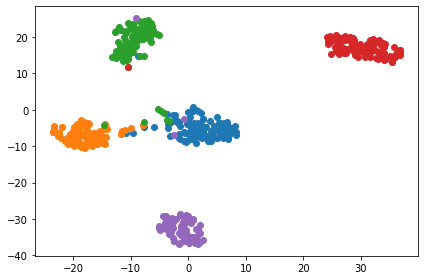

In [25]:
%run -i visualize.py $DATASET_NAME

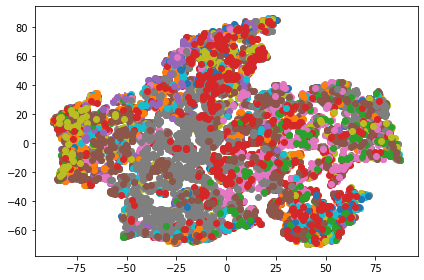

In [26]:
%run -i visualize_words.py $DATASET_NAME

## Prediction

*Still looking into way to utilize saved model to make predictions*